#  Potato Plant Diseases Data 🍂🍂🍂🌱🌱🌱🥔🥔🥔

Potato Plant Diseases Detection Using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


Data Preprocessing

In [4]:
# Defining variables
BATCH_SIZE = 32
IMAGE_SIZE = 256
EPOCHS = 50
CHANNELS = 3

In [5]:
# Retrieve images and divide into three classes
dataset = tf.keras.preprocessing.image_dataset_from_directory(r'C:\Users\PC\Documents\Data-Science-Tasks\ML-Image-Classification\Potato Image Classification\PlantVillage',
                                                              shuffle = True,
                                                              image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size = BATCH_SIZE
)


Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

# Data Visualizations

(32, 256, 256, 3)
[1 1 1 2 1 0 0 1 1 1 1 0 1 2 1 0 0 2 1 0 1 1 1 1 0 0 0 0 1 1 0 0]


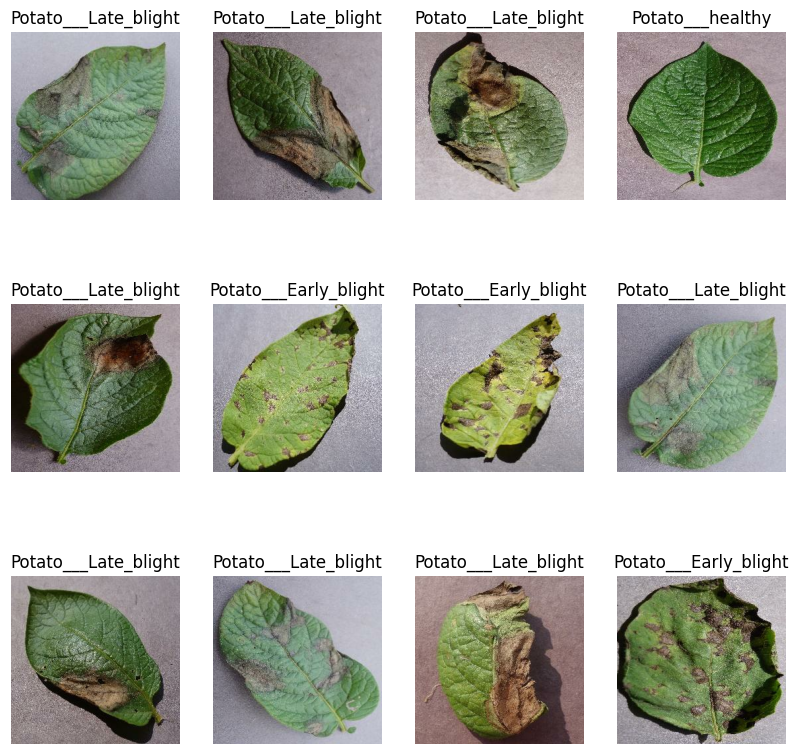

In [7]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.numpy().shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[labels_batch[i]])
        plt.axis('off')

Train Test Split

In [8]:
# Convert data into train test split
# 80% training 10% validation 10% Testing
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = train_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

Splitting Using Functions

In [14]:
#function that returns train, validation and test split
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 1000):
    assert(train_split + test_split + val_split) == 1
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(val_ds)

6

Cache, Shuffle, Prefetch

In [17]:
# Performing cache, shuffle, prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.numpy())

[[[[178. 157. 154.]
   [175. 154. 151.]
   [172. 151. 148.]
   ...
   [165. 143. 145.]
   [156. 134. 136.]
   [149. 127. 129.]]

  [[187. 166. 163.]
   [183. 162. 159.]
   [178. 157. 154.]
   ...
   [164. 142. 144.]
   [155. 133. 135.]
   [147. 125. 127.]]

  [[188. 167. 164.]
   [183. 162. 159.]
   [178. 157. 154.]
   ...
   [163. 141. 143.]
   [160. 138. 140.]
   [155. 133. 135.]]

  ...

  [[150. 119. 117.]
   [147. 116. 114.]
   [142. 111. 109.]
   ...
   [138. 107. 105.]
   [130.  99.  97.]
   [125.  94.  92.]]

  [[144. 113. 111.]
   [142. 111. 109.]
   [140. 109. 107.]
   ...
   [128.  97.  95.]
   [124.  93.  91.]
   [122.  91.  89.]]

  [[138. 107. 105.]
   [139. 108. 106.]
   [140. 109. 107.]
   ...
   [132. 101.  99.]
   [131. 100.  98.]
   [130.  99.  97.]]]


 [[[181. 184. 193.]
   [179. 182. 191.]
   [181. 184. 193.]
   ...
   [165. 162. 171.]
   [167. 164. 173.]
   [159. 156. 165.]]

  [[172. 175. 184.]
   [169. 172. 181.]
   [171. 174. 183.]
   ...
   [161. 158. 167.]
 

Preprocessing During Model Creation

In [21]:
#Preprocessing during model creation Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

Data Augmentation

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

Model Creation

In [28]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3) ,activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation = 'softmax'),
    
])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.build(input_shape = input_shape)

Model Summary

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 254, 254, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 127, 127, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 125, 125, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,219 (1.13 MB)

 Trainable params: 297,219 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)